# Built-in Extensions

In the last question, we showed how users can write their own extensions to be used with FugueSQL. Commonly used extensions like plotting libraries are added into the Fugue library so that users don't need to write them from scratch. This is a good way to contribute to Fugue and requires minimal lines of code. For example, check the [seaborn integration](https://github.com/fugue-project/fugue/blob/master/fugue_contrib/seaborn/__init__.py). If you are interested in contributing an integration, please reach out in the Slack channel below.

Have questions? Chat with us on Github or Slack:

[![Homepage](https://img.shields.io/badge/fugue-source--code-red?logo=github)](https://github.com/fugue-project/fugue)
[![Slack Status](https://img.shields.io/badge/slack-join_chat-white.svg?logo=slack&style=social)](http://slack.fugue.ai)

## Setup

Pandas will be used to demo the built-in extensions, but the extensions can be used with FugueSQL on any backend. In some cases, it may require bringing the data to a Pandas DataFrame before it can be applied.

For example, these extensions will also work with the [BigQuery backend](../integrations/warehouses/bigquery.ipynb).

Note that even if the libraries under the hood are not explicitly imported, they will still need to be installed. If a library in installed in Jupyter, the kernel needs to be restarted for it to take effect.

In [1]:
from fugue_jupyter import setup
setup()

In [2]:
import pandas as pd

df = pd.DataFrame({"group": ["A", "A", "A", "B", "B", "B"],
                   "val1": [1, 2, 3, 3, 4, 5],
                   "val2": [2, 4, 6, 8, 10, 12]})

## Seaborn

[Seaborn](https://github.com/mwaskom/seaborn) is a statistical plotting library built on top of matplotlib. It can be used along with FugueSQL to plot the last DataFrame. This needs seaborn version 0.12.2 and above.

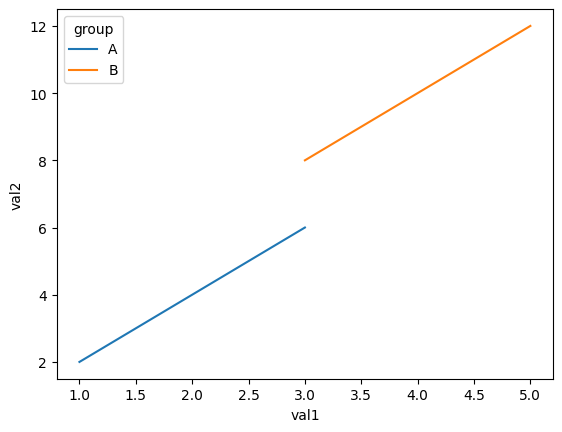

In [3]:
%%fsql
SELECT group, val1, val2
  FROM df
OUTPUT USING sns:lineplot(x="val1",y="val2",hue="group")

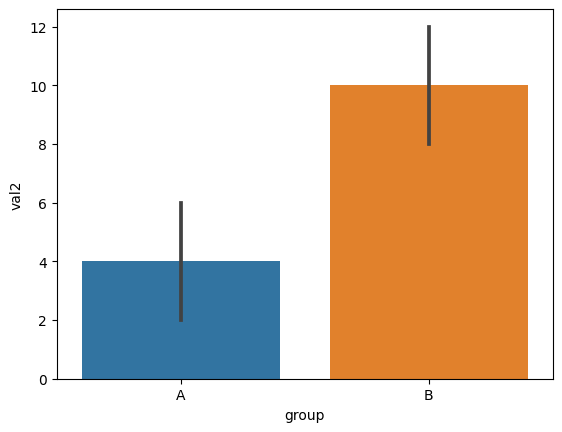

In [4]:
%%fsql
SELECT group, val1, val2
  FROM df
OUTPUT USING sns:barplot(x="group",y="val2")

## Pandas Plotting

Pandas plotting uses the [plotting capabilities](https://pandas.pydata.org/docs/user_guide/visualization.html) of Pandas. This is a good alternative if installing or using seaborn is too heavyweight.

Pandas plotting capabilities are registered under the `viz` namespace.

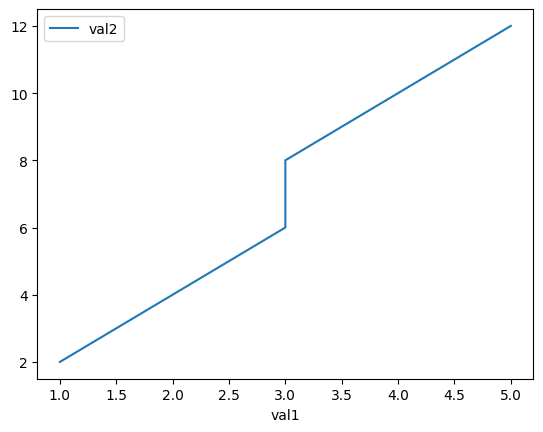

In [5]:
%%fsql
SELECT *
  FROM df
OUTPUT USING viz:plot(x="val1", y="val2")

## Whylogs

[Whylogs](https://github.com/whylabs/whylogs) is a data logging library that scalably profiles data for applications like data validation and anomaly detection. 

This needs the visualization part of whylogs. To install: 

`pip install whylogs[viz]`

There are two ways to use it. The first one is just profiling a dataset. The second one is comparing a new dataset against a reference dataset. 

In [6]:
%%fsql
SELECT *
  FROM df
OUTPUT USING why:viz

For the reference use case, we need another DataFrame.

In [7]:
df2 = df.copy()

In [8]:
%%fsql
SELECT *
  FROM df
OUTPUT reference=df, target=df2 USING why:viz

## Ipyvizzu

[Ipyvizzu](https://github.com/vizzuhq/ipyvizzu) is a visualization library that provides a minimal Python syntax to create animated charts. Fugue simplified calling the preset charts that are [documented here](https://ipyvizzu.vizzuhq.com/latest/examples/presets/).

For example, the following Python code:

```python
from ipyvizzu import Chart, Data, Config
chart = Chart(width="640px", height="360px")

data = Data()
data.add_data_frame(df)

chart.animate(
    Config.bubbleplot(
        {
            "size": "val1",
            "color": "group",
            "title": "Plot Title",
        }
    )
)
```

All methods of the `Config` class can be used with FugueSQL. The output of ipyvizzu is an interactive widget which responds to user actions. It can't be rendered in the documentation, so the image below is just a screenshot.

In [ ]:
%%fsql
SELECT *
  FROM df
OUTPUT USING vizzu:bubbleplot(size="val2", color="group", title="Plot Title")

![img](../../images/fugue_sql/ipyvizzu.png)